# Classification Modeling on Adult Income Dataset:

#### All of the libraries I will be using for this proyect 

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import mean
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler, label_binarize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [7]:
df = pd.read_csv('adult_income.csv')

#### Understanding the data
##### - Reading the columns and seeing the rows, check if any binary and get and idea of what we are working with
##### - Size of the dataset 

In [9]:
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
df.shape

(48842, 15)

#### Preprocessing
##### - Check missing values 
##### - Investigate to avoid dropping (try to sort the missing info. with possible answers in the same data)}
##### - Check outliers and how to handle them (dropping, mean or set to 0)
##### - Handle duplicates

In [12]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [13]:
print(df[df['workclass'].isnull()])  

       age workclass  fnlwgt     education  education_num  \
27      54       NaN  180211  Some-college             10   
61      32       NaN  293936       7th-8th              4   
69      25       NaN  200681  Some-college             10   
77      67       NaN  212759          10th              6   
106     17       NaN  304873          10th              6   
...    ...       ...     ...           ...            ...   
48682   61       NaN  265201  Some-college             10   
48769   21       NaN  212661  Some-college             10   
48800   73       NaN  144872       HS-grad              9   
48812   81       NaN   26711     Assoc-voc             11   
48838   64       NaN  321403       HS-grad              9   

              marital_status occupation    relationship                race  \
27        Married-civ-spouse        NaN         Husband  Asian-Pac-Islander   
61     Married-spouse-absent        NaN   Not-in-family               White   
69             Never-married  

### Analyzing the data I have some assumptions with it, looking at the column that are null we have 2 very similiar in numbers and when analyzing them is workclass and occupation they have correlation, which could mean null in workclass someone that doesn't work currently but moving to occupation there is a 10 person difference, meaning it could possibly be not currently working but occupation could be retired, student, etc. meaning this values could be valid just need to check and verify 

## Workclass null with Occupation not null. ex. I don't work (workclass null) but I'm a student (ocuppation not null)

In [16]:
df[df['workclass'].isnull() & df['occupation'].notnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


#### Looks like there is no situation where this is the case

## Occupation null with Workclass not null. ex. Workclass N/A and no Occupation since I don't work/have never worked

In [19]:
df[df['occupation'].isnull() & df['workclass'].notnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K
41346,17,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K
44168,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K
46459,18,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K


In [20]:
df[df['occupation'].isnull() & df['workclass'].notnull()].shape[0]

10

#### We can see one of the hypothesis is correct since we do have results and the number of rows (10) is the same amount we previously stated.

## Check the rows where null both columns are null, which probably means they don't work/never worked and do nothing since they have no Occupation

In [23]:
df[df['workclass'].isnull() & df['occupation'].isnull()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61,NaN,265201,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,14,United-States,<=50K
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K


In [24]:
df[df['workclass'].isnull() & df['occupation'].isnull()].shape[0]

2799

### - Looks like everything is correct, since both the missing columns where 2799 rows and 2809, which we did get 2799 in one of the filters and 10 in the other which combine make 2809.
### - Deciding what to do with them will be the important part, since they are quite a lot and it does make sense if people don't work and don't have an Occupation, at the end seems like all the 2809 null values refer to the same, not currently doing it.
### - Will be checking if there is a value among the lines no-currently or unemployed, etc, if there is I will be converting the nulls to that, if there isn't I will be converting to a new option in the row.

In [26]:
print(f"Unique options in Workclass column: {df['workclass'].value_counts()}")

Unique options in Workclass column: workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [27]:
print(f"Unique options in Occupation column: {df['occupation'].value_counts()}")

Unique options in Occupation column: occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


## Checking the unique values for each column we can't see a current value that is closer to N/A in Occupation and Workclass, for Workclass we do see Never-worked but if it wasn't selected it means they have worked but not currently.
### - Changing the nulls -> unemployed in Workclass.
### - Changing the nulls -> none in Occupation.
#### For Occupation I wasn't able to find any other term, I was think no occupation, but 2 words make it a bit different to handle later on.

In [29]:
df['workclass'] = df['workclass'].fillna("unemployed")

In [30]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
unemployed           2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [31]:
df['occupation'] = df['occupation'].fillna("none")

In [32]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
none                 2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

## Nulls for Occupation and Workclass have been handle correctly.
### - Handle nulls for native_country, for this I will be comparing with race

In [34]:
df['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

#### Looks like race is not a good way to find native country, I will be doing by groupby meaning the most commun country per race

In [36]:
country_by_race = df.groupby('race')['native_country'].apply(lambda x: x.mode()[0])

df['native_country'] = df.apply(lambda row:country_by_race[row['race']] if pd.isnull(row['native_country']) else row ['native_country'], axis=1)

In [37]:
df['native_country'].value_counts()

native_country
United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

## Null values have been handle correctly
#### - Handle duplicate values

In [39]:
df.duplicated().sum()

52

In [40]:
df = df.drop_duplicates()

In [41]:
df.duplicated().sum()

0

# Outliers
#### - Visualize the outliers
#### - Decide how to handle them, using mean or 0 since dropping is not an option

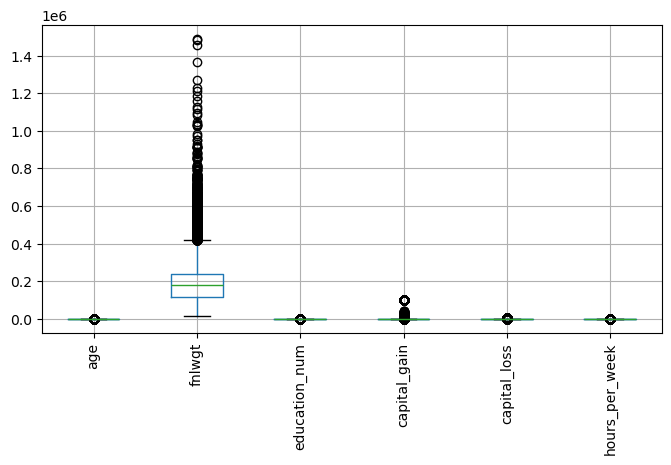

In [43]:
plt.figure(figsize=(8, 4))
df.drop(columns=["income"]).boxplot()
plt.xticks(rotation=90)
plt.show()

### Leaving the outliers is being cosider since I feel like altering columns like capital gain and fnwgt could make a lot of difference when it comes to my model, most of the columns could be used for important data that putting the mean or square root feels like it will be messing with the dataset too much 

## Observations with the numerical columns

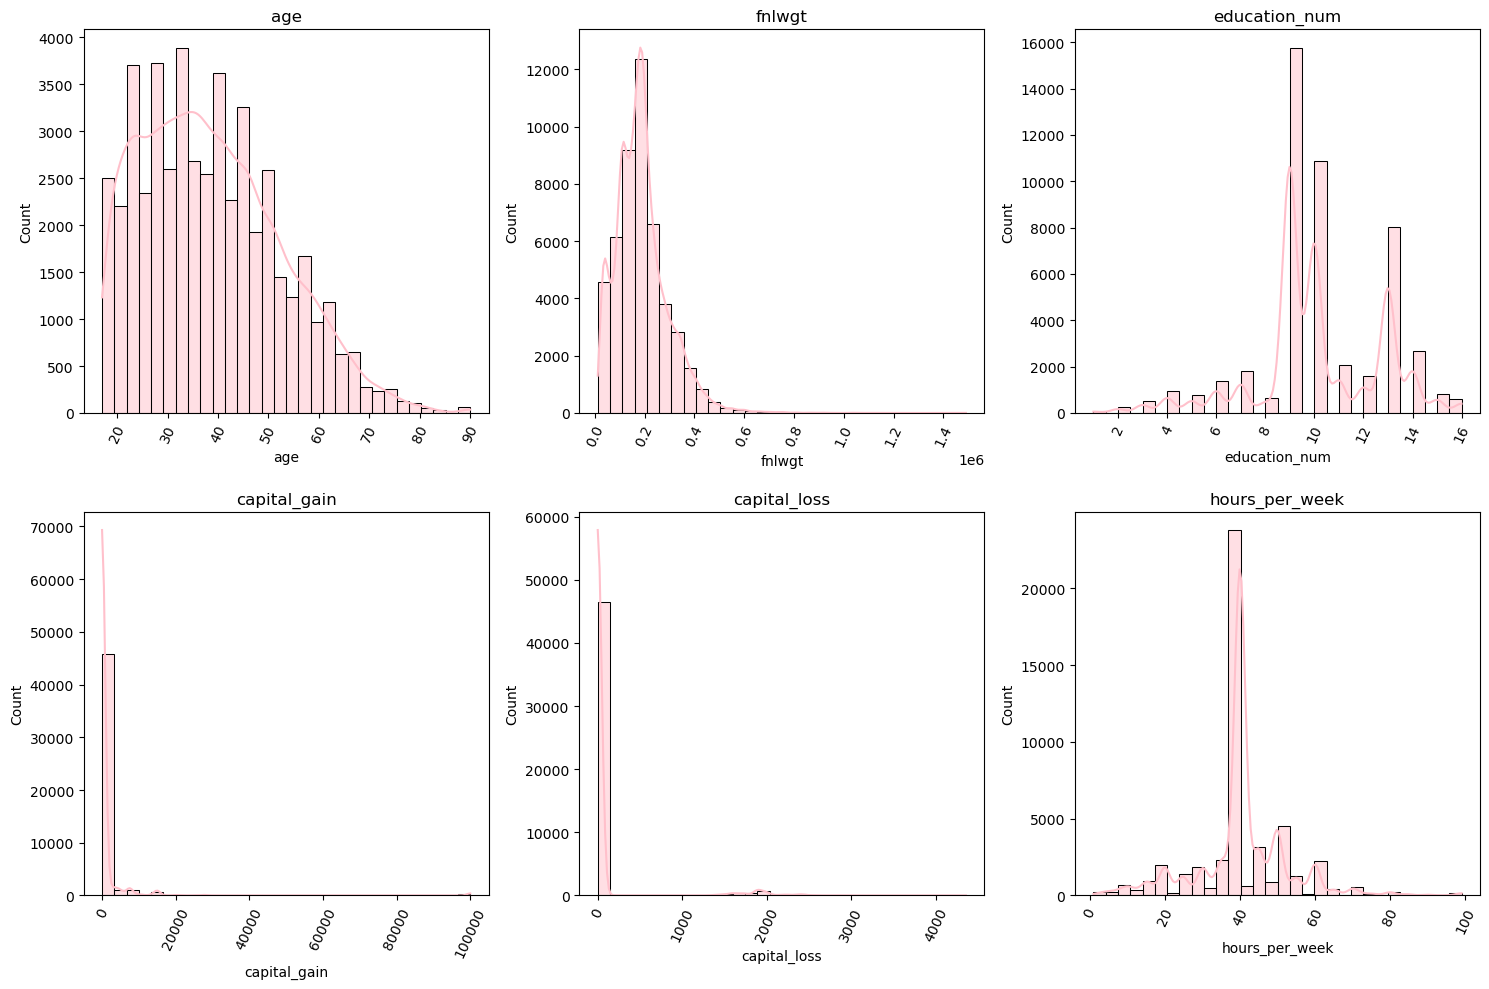

In [46]:
numerical_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

plt.figure(figsize=(15, 10))


for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)  
    sns.histplot(df[col], kde=True, color='pink', bins=30, edgecolor='black')
    plt.title(col)  
    plt.xticks(rotation=65)

plt.tight_layout() 
plt.show()

## Observations
#### - We can see the outliers defenetly are present but also reinforces the idea of leaving them was the correct one, for example hours per week the outlier is 40 since you can see the spike but 40 is the normal full time job, age which was the only one that I didn't feel it will be having a big impact if I did mean or square root change seems to be peaking more because the end of it is so low that it makes the beginng making the outliers look more extreme 

# Encoding 
#### - Perform encoding for the categorical columns
#### - Between Label Encoding, One hot Encoding and Ordinal Encoding 
#### - Will be doing different encodings for different columns
#### Label Encoding -> Sex/Income/Workclass/Occupation/Maritial Status/Relationship/Race/Native Country
#### One-hot -> Race

### Hoping the space is enough and used the binary columns as label.
#### Why I choose One-hot for all the columns, except binary columns, since label encoding assigns a number for each one of them I have been reading it will be assuming the numbers have importance, meaning will be thinking a column is more important than the other one and numbers that are closer will be assumed to be more similar in some way to another...which is not true hands why I'm mostly doing one-hot even do it will be taking so much more space

# Label encoding 
##### Only Sex and Income

In [50]:
#df.dtypes
le = LabelEncoder()
#df['sex'] = le.fit_transform(df['sex'])
for col in ['sex', 'income', 'workclass', 'occupation', 'marital_status', 'relationship', 'native_country']:
    df[col] = le.fit_transform(df[col])

# One-hot encoding
##### Only Workclass/Occupation/Maritial Status/Relationship/Race/Native Country

In [52]:
df = pd.get_dummies(df, columns=['race'], drop_first=True)

In [53]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,6,77516,Bachelors,13,4,0,1,1,2174,0,40,38,0,False,False,False,True
1,50,5,83311,Bachelors,13,2,3,0,1,0,0,13,38,0,False,False,False,True
2,38,3,215646,HS-grad,9,0,5,1,1,0,0,40,38,0,False,False,False,True
3,53,3,234721,11th,7,2,5,0,1,0,0,40,38,0,False,True,False,False
4,28,3,338409,Bachelors,13,2,9,5,0,0,0,40,4,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,215419,Bachelors,13,0,9,1,0,0,0,36,38,0,False,False,False,True
48838,64,8,321403,HS-grad,9,6,14,2,1,0,0,40,38,0,False,True,False,False
48839,38,3,374983,Bachelors,13,2,9,0,1,0,0,50,38,0,False,False,False,True
48840,44,3,83891,Bachelors,13,0,0,3,1,5455,0,40,38,0,True,False,False,False


### For Education seems like it's already encoded that why I'm not encoding it, just need to understand how the values correlate with the numbers

In [55]:
df['education'].value_counts()

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

#### With this being set I will be dropping 'education'

In [57]:
df = df.drop('education', axis=1)

In [58]:
df

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,6,77516,13,4,0,1,1,2174,0,40,38,0,False,False,False,True
1,50,5,83311,13,2,3,0,1,0,0,13,38,0,False,False,False,True
2,38,3,215646,9,0,5,1,1,0,0,40,38,0,False,False,False,True
3,53,3,234721,7,2,5,0,1,0,0,40,38,0,False,True,False,False
4,28,3,338409,13,2,9,5,0,0,0,40,4,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,215419,13,0,9,1,0,0,0,36,38,0,False,False,False,True
48838,64,8,321403,9,6,14,2,1,0,0,40,38,0,False,True,False,False
48839,38,3,374983,13,2,9,0,1,0,0,50,38,0,False,False,False,True
48840,44,3,83891,13,0,0,3,1,5455,0,40,38,0,True,False,False,False


# Understanding the already encoded 'education' column 
#### In order of importancy it will go like this:
####  Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, 
####  10th, 11th, 12th, HS-grad, Some-college,
####  Assoc-voc, Assoc-acdm, Bachelors, Masters, Prof-school, Doctorate

# Correlation Matrix

In [61]:
#corr = df.corr()
#sns.heatmap(corr, annot=True, cmap='Reds', fmt='.2f')

In [62]:
correlation_matrix = df.corr()
correlation_matrix

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income,race_Asian-Pac-Islander,race_Black,race_Other,race_White
age,1.000000,0.051774,-0.076451,0.030635,-0.263594,0.006872,-0.263395,0.088043,0.077185,0.056838,0.071223,-0.003017,0.230144,-0.010701,-0.017415,-0.033379,0.032364
workclass,0.051774,1.000000,-0.022650,-0.053040,0.045937,0.316528,0.018090,-0.000266,0.008124,-0.005968,-0.095457,-0.001491,-0.061400,0.009523,-0.034410,0.001877,0.027139
fnlwgt,-0.076451,-0.022650,1.000000,-0.038727,0.029779,-0.003646,0.009017,0.027879,-0.003715,-0.004378,-0.013521,-0.058299,-0.006309,-0.050636,0.126036,0.005244,-0.063810
education_num,0.030635,-0.053040,-0.038727,1.000000,-0.069859,0.045040,-0.090697,0.009364,0.125219,0.080986,0.143915,0.089359,0.332802,0.064256,-0.074508,-0.044158,0.049410
marital_status,-0.263594,0.045937,0.029779,-0.069859,1.000000,0.050170,0.187770,-0.127505,-0.043924,-0.033790,-0.185444,-0.017541,-0.198855,0.017807,0.082763,0.015122,-0.081854
occupation,0.006872,0.316528,-0.003646,0.045040,0.050170,1.000000,-0.010882,0.022017,0.008141,0.006818,-0.060451,-0.000741,0.007275,0.010883,0.004706,0.004323,-0.010103
relationship,-0.263395,0.018090,0.009017,-0.090697,0.187770,-0.010882,1.000000,-0.579955,-0.056543,-0.057243,-0.250319,-0.007092,-0.253175,0.011735,0.137471,0.016184,-0.132352
sex,0.088043,-0.000266,0.027879,0.009364,-0.127505,0.022017,-0.579955,1.000000,0.047127,0.045517,0.228529,-0.002544,0.214639,-0.003524,-0.111646,-0.009774,0.101261
capital_gain,0.077185,0.008124,-0.003715,0.125219,-0.043924,0.008141,-0.056543,0.047127,1.000000,-0.031475,0.082152,0.007884,0.223047,0.011030,-0.021492,-0.001192,0.014835
capital_loss,0.056838,-0.005968,-0.004378,0.080986,-0.033790,0.006818,-0.057243,0.045517,-0.031475,1.000000,0.054431,0.006466,0.147542,0.003593,-0.021006,-0.005597,0.020624


# Inside on previous error
#### The encoding you see at the moment where most of them are made with label encoding was not my first choice, since label encoding can be bias I tried using most of the columns with One-hot encoding, which wasn't the best result, I ended up with around 80ish columns and when doing the matrix the data was so big it was an issue to visualize correlation, It was taking longer and longer to run codes so I decided to change the encoding and do most of it in label encoding with the smaller ones on One-hot, It can be seen in my commit with the description similar to this issue.

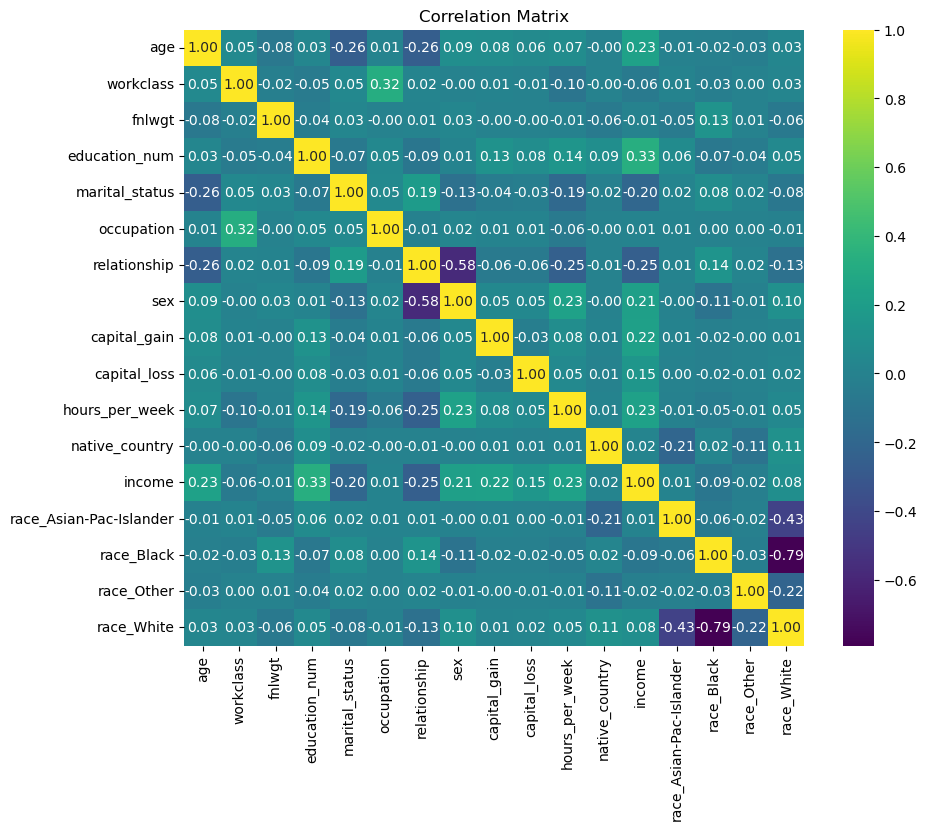

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Observations
#### Occupation and Workclass doesn't have the strongest relation in our dataset, which I thougt It will. 
#### The column with most correlation are education and income, which I did assume it was going to be high but not the highest.
#### Age correlating highly with income but not with education was interesting to see.
#### Age and relationship is weak negative correlation which I find interesting.

# So I will be choosing 80/20 split for training and testing and using RobusScaling due to the outliers
#### - Split the data (income)
#### - Use RobustScaling 

In [67]:
x = df.drop(columns=['income'])
y = df['income']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
print(f"80/20 Split - Training: {x_train.shape}, Testing: {x_test.shape}")

80/20 Split - Training: (39032, 16), Testing: (9758, 16)


## Scaling

In [71]:
rscaler = RobustScaler()

In [72]:
x_train_scaled = rscaler.fit_transform(x_train)
x_test_scaled = rscaler.transform(x_test)

In [73]:
print("Mean (Train):", np.mean(x_train_scaled, axis=0))
print("Std (Train):", np.std(x_train_scaled, axis=0))

Mean (Train): [ 7.96346587e-02  3.82609141e-01  9.43057046e-02  2.59616042e-02
  3.10142960e-01  6.07194097e-02  1.49543964e-01 -3.32086493e-01
  1.07585981e+03  8.91506200e+01  8.21121131e-02 -1.55139373e+00
  3.07183849e-02  9.64849354e-02  8.86452142e-03 -1.45419143e-01]
Std (Train): [6.84965055e-01 1.58720445e+00 8.73972341e-01 8.55081434e-01
 7.54789558e-01 6.17383361e-01 5.34200205e-01 4.70961839e-01
 7.43951491e+03 4.06069951e+02 2.48893179e+00 6.00039903e+00
 1.72553660e-01 2.95255131e-01 9.37333541e-02 3.52522930e-01]


# Observations
#### - The ranges are resonable considering the crazy outliers we have, which makes me confident with the scaling

# Machine Learning
### Create the models and for each one make the confusion matrix, classification report and accuracy score with 2 decimals.
#### - Logistic Regression
#### - KNN
#### - Decision Tree
#### - SVM
#### - Random Forest

## Logistic Regression

In [77]:
lr = LogisticRegression(random_state=16, max_iter=4000)
lr.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=4000, random_state=16)

In [78]:
y_pred_lr= lr.predict(x_test_scaled)
y_pred_lr

array([1, 0, 0, ..., 0, 1, 0])

In [79]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr:.2f}')

Accuracy: 0.82


## Confusion Matrix

In [81]:
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(f"TN -> {conf_matrix[0,0]} FP -> {conf_matrix[0,1]}\nFN -> {conf_matrix[1,0]} TP -> {conf_matrix[1,1]}")

TN -> 6944 FP -> 419
FN -> 1316 TP -> 1079


## Classification Report

In [83]:
y_pred_lr = lr.predict(x_test_scaled)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7363
           1       0.72      0.45      0.55      2395

    accuracy                           0.82      9758
   macro avg       0.78      0.70      0.72      9758
weighted avg       0.81      0.82      0.81      9758



## KNN

In [85]:
error_rates = []
k_values = range(1, 50)  

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  
    knn.fit(x_train_scaled, y_train)  
    y_pred_knn = knn.predict(x_test_scaled)  
    error = 1 - accuracy_score(y_test, y_pred_knn) 
    error_rates.append(error)

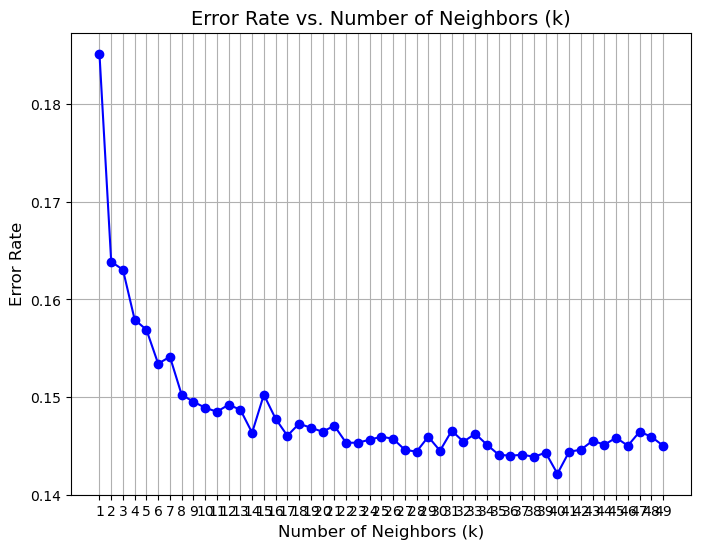

In [86]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='b')
plt.title('Error Rate vs. Number of Neighbors (k)', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### I had to reduce the rnage since round 100-200 was taking too long to run

In [88]:
best_k = k_values[error_rates.index(min(error_rates))]

print(f"The best k value is {best_k} with an error rate of {min(error_rates):.2f}")

The best k value is 40 with an error rate of 0.14


## Confusion Matrix

In [90]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print(f"TN -> {conf_matrix[0,0]} FP -> {conf_matrix[0,1]}\nFN -> {conf_matrix[1,0]} TP -> {conf_matrix[1,1]}")

TN -> 6943 FP -> 420
FN -> 995 TP -> 1400


## Classification Report

In [92]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      7363
           1       0.77      0.58      0.66      2395

    accuracy                           0.85      9758
   macro avg       0.82      0.76      0.79      9758
weighted avg       0.85      0.85      0.85      9758



## Decision Tree (Plot the decision tree as well)

In [94]:
dt_clr = DecisionTreeClassifier()
dt_clr.fit(x_train, y_train)

DecisionTreeClassifier()

In [95]:
y_dt_pred = dt_clr.predict(x_test)
y_dt_pred

array([1, 1, 0, ..., 0, 1, 0])

In [96]:
dt_clr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_dt_pred})
dt_clr_df

,Actual,Predicted
3168,1,1
25272,0,1
33670,0,0
29927,0,0
11100,1,0
...,...,...
40812,0,0
40605,1,1
25419,0,0
38909,1,1


In [97]:
dt_accuracy = accuracy_score(y_test, y_dt_pred)
print(f"Accuracy for Decision Tree Classifier: {dt_accuracy:.2f}")

Accuracy for Decision Tree Classifier: 0.81


#### Not the best result, I will consider a good result model above .8 and this is barely able to be above .8 and it's decision tree which I was hopping for a better result
#### Will be Optimizing the accuracy

In [99]:
scores = []
depths = range(1, 21)
for d in depths:
    score = cross_val_score(DecisionTreeClassifier(criterion= 'gini', max_depth=d), x_train, y_train, cv=5)
    avg_score = mean(score)
    scores.append(avg_score)

In [100]:
best_depth = depths[np.argmax(scores)]
print(f"Best max_depth: {best_depth}")

Best max_depth: 9


In [101]:
dt_clr_opt = DecisionTreeClassifier(criterion='gini', max_depth=9)
dt_clr_opt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [102]:
y_dt_opt_pred = dt_clr_opt.predict(x_test)

In [103]:
print(f"Accuracy score for the optimized decision tree classifier: {accuracy_score(y_test, y_dt_opt_pred)}")

Accuracy score for the optimized decision tree classifier: 0.8548882967821275


#### I did ran Gini and Entropy this are the results:
#### - Entropy: 0.851506456241033
#### - Gini: 0.8548882967821275
#### I will be using Gini for the little advantage

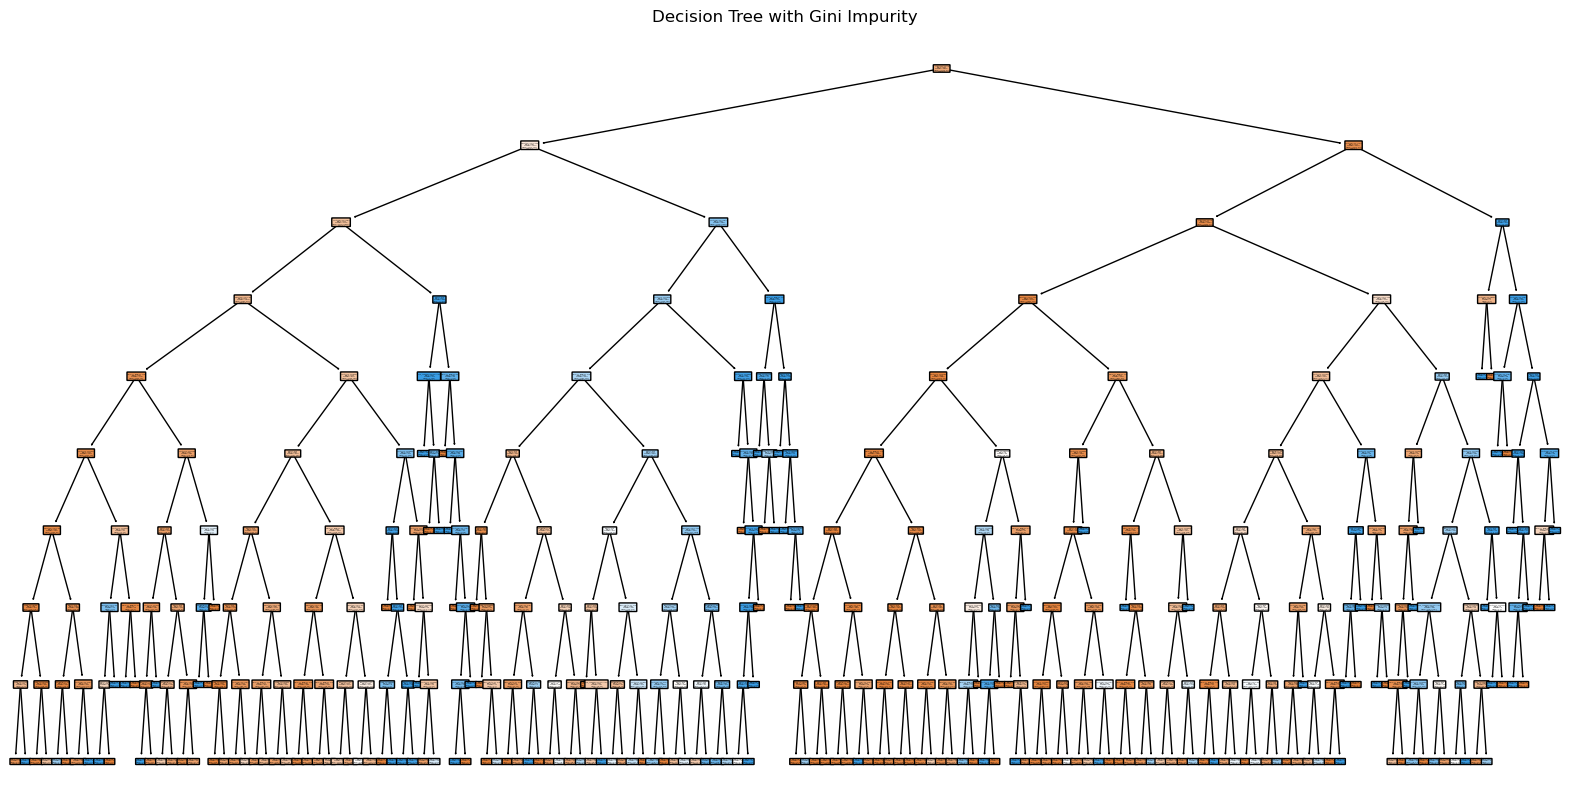

In [105]:
plt.figure(figsize=(20,10))  
plot_tree(dt_clr_opt, filled=True, feature_names=x_train.columns, class_names=y_train.unique().astype(str), rounded=True)
plt.title("Decision Tree with Gini Impurity")
plt.show()

## Confusion Matrix
##### For the optimized tree

In [107]:
conf_matrix = confusion_matrix(y_test, y_dt_opt_pred)
print(f"TN -> {conf_matrix[0,0]} FP -> {conf_matrix[0,1]}\nFN -> {conf_matrix[1,0]} TP -> {conf_matrix[1,1]}")

TN -> 6978 FP -> 385
FN -> 1031 TP -> 1364


## Classification Report
##### For the optimized tree

In [109]:
print(classification_report(y_test, y_dt_opt_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7363
           1       0.78      0.57      0.66      2395

    accuracy                           0.85      9758
   macro avg       0.83      0.76      0.78      9758
weighted avg       0.85      0.85      0.85      9758



## SVM

In [111]:
svc = SVC() 
svc.fit(x_train, y_train)

SVC()

In [112]:
y_svc_pred = svc.predict(x_test)
y_svc_pred

array([0, 0, 0, ..., 0, 1, 0])

In [113]:
results_diff1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_svc_pred})
results_diff1

,Actual,Predicted
3168,1,0
25272,0,0
33670,0,0
29927,0,0
11100,1,0
...,...,...
40812,0,0
40605,1,0
25419,0,0
38909,1,1


In [114]:
print(f'Accuracy score for SVM classifier: {accuracy_score(y_test, y_svc_pred):.2f}')

Accuracy score for SVM classifier: 0.79


### Braking down how to optimize 
### For SVM, like Decision Tree we have a way to optimize the accuracy with the C and Kernel method, will be performing lineal and rbf on Kernel/Poly and C=1, 100, 1000. 
### - Before doing this we have to check outliers after they have been scaled, in this case we did scaling with Robust, if we have a lot of outliers we should probably be going for lower C value and viceversa.

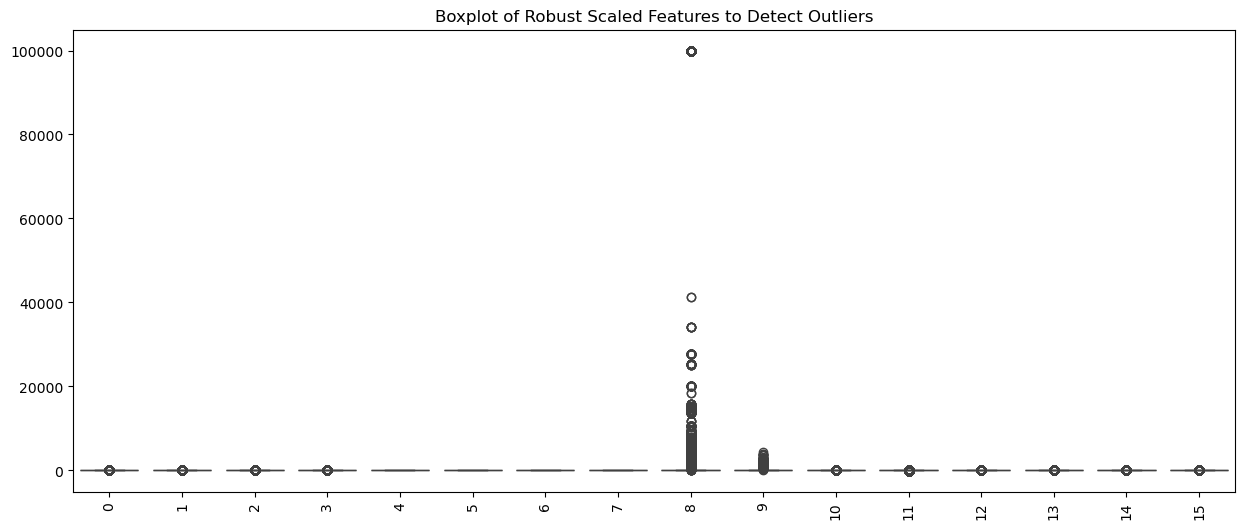

In [116]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=x_train_scaled)  
plt.xticks(rotation=90)
plt.title("Boxplot of Robust Scaled Features to Detect Outliers")
plt.show()

### As expected, still a lot since it waas Robust scaling, so the higher the C the more my computer is fighting to run the code since we do have a high number of outliers meaning we should be using low #C, I will be just running 1 and 5, instead of high numbers, I don't think high number will be more effective (probably overfitting) and will take forever to run on my laptop.

## RBF

In [119]:
svc_opt_rbf = SVC(C=1)
svc_opt_rbf.fit(x_train, y_train)

y_pred = svc_opt_rbf.predict(x_test)
print(f'Accuracy score with C=1 and rbf kernel: {accuracy_score(y_test, y_pred)}')

Accuracy score with C=1 and rbf kernel: 0.7947325271572043


In [120]:
svc_opt_rbf = SVC(C=5)
svc_opt_rbf.fit(x_train, y_train)

y_pred = svc_opt_rbf.predict(x_test)
print(f'Accuracy score with C=100 and rbf kernel: {accuracy_score(y_test, y_pred)}')

Accuracy score with C=100 and rbf kernel: 0.7936052469768395


## Linear

In [122]:
#svc_opt_linear = SVC(kernel='linear', C=1)
#svc_opt_linear.fit(x_train, y_train)
#y_pred = svc_opt_linear.predict(x_test)
#print(f'Accuracy score for C=1 and linear kernel: {accuracy_score(y_test, y_pred)}')

In [123]:
#svc_opt_linear = SVC(kernel='linear', C=5)
#svc_opt_linear.fit(x_train, y_train)
#y_pred = svc_opt_linear.predict(x_test)
#print(f'Accuracy score for C=100 and linear kernel: {accuracy_score(y_test, y_pred)}')

## Poly

In [125]:
#svc_opt_poly = SVC(kernel='poly', C=1)
#svc_opt_poly.fit(x_train, y_train)
#y_pred = svc_opt_poly.predict(x_test)
#print(f'Accuracy score for C=1 and poly kernel: {accuracy_score(y_test, y_pred)}')

In [126]:
#svc_opt_poly = SVC(kernel='poly', C=5)
#svc_opt_poly.fit(x_train, y_train)
#y_pred = svc_opt_poly.predict(x_test)
#print(f'Accuracy score for C=100 and poly kernel: {accuracy_score(y_test, y_pred)}')

## Confusion Matrix

In [128]:
#svc_models = {
    "rbf_C1": SVC(kernel="rbf", C=1),
    "rbf_C5": SVC(kernel="rbf", C=5),
    "linear_C1": SVC(kernel="linear", C=1),
    "linear_C5": SVC(kernel="linear", C=5),
    "poly_C1": SVC(kernel="poly", C=1),
    "poly_C5": SVC(kernel="poly", C=5)
}

#for name, model in svc_models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict

    # Print Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {name}: {acc:.2f}')
    
    # Print Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n"
          f"TN -> {conf_matrix[0,0]}  FP -> {conf_matrix[0,1]}\n"
          f"FN -> {conf_matrix[1,0]}  TP -> {conf_matrix[1,1]}\n")
    
    # Print Classification Report
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")

IndentationError: unexpected indent (3206598252.py, line 2)

## Random Forest

In [133]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [134]:
y_rf_pred = rf.predict(x_test)
y_rf_pred

array([1, 1, 0, ..., 0, 1, 0])

In [135]:
results_diff2 = pd.DataFrame({'Actual': y_test, 'Predicted':y_rf_pred})
results_diff2

,Actual,Predicted
3168,1,1
25272,0,1
33670,0,0
29927,0,0
11100,1,0
...,...,...
40812,0,0
40605,1,0
25419,0,0
38909,1,1


In [136]:
print(f'Accuracy score of Random Forest Classifier: {accuracy_score(y_test, y_rf_pred):.2f}')

Accuracy score of Random Forest Classifier: 0.85


## Confusion Matrix

In [138]:
conf_matrix = confusion_matrix(y_test, y_rf_pred)
print(f"TN -> {conf_matrix[0,0]} FP -> {conf_matrix[0,1]}\nFN -> {conf_matrix[1,0]} TP -> {conf_matrix[1,1]}")

TN -> 6811 FP -> 552
FN -> 884 TP -> 1511


## Classification Report

In [140]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.90      7363
           1       0.73      0.63      0.68      2395

    accuracy                           0.85      9758
   macro avg       0.81      0.78      0.79      9758
weighted avg       0.85      0.85      0.85      9758



# AUC-ROC

C:\Users\Emilio Vadillo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


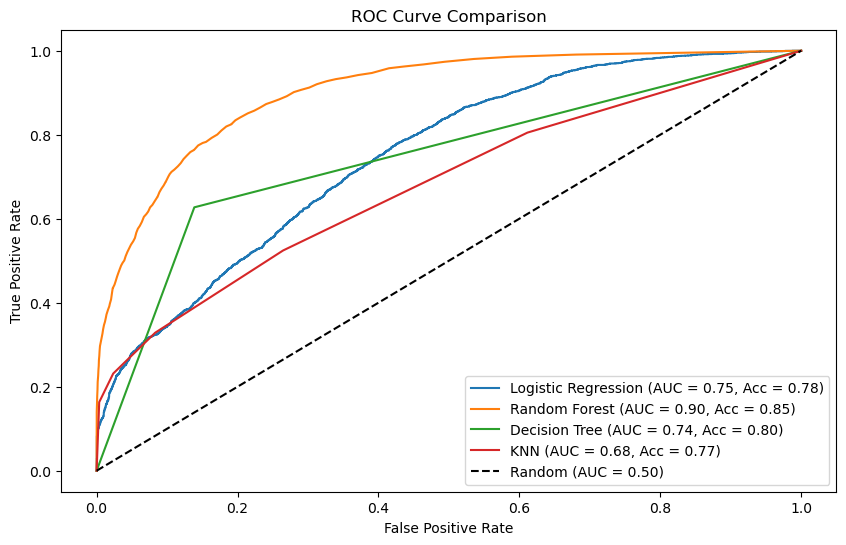

In [153]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

models = {
    "Logistic Regression": LogisticRegression(),
    #"SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

plt.figure(figsize=(10, 6))


for name, model in models.items():
    model.fit(x_train, y_train)  
    y_proba = model.predict_proba(x_test)[:, 1]  
    y_pred = model.predict(x_test)  

    accuracy = accuracy_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test_binarized, y_proba)
    roc_auc = auc(fpr, tpr)  

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f}, Acc = {accuracy:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.50)")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right', fontsize=10)
plt.show()